# kmeans 알고리즘으로 iris 품종 구분하기 

In [230]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [231]:
import pandas as pd 

In [232]:
from sklearn.cluster import KMeans
iris_df = pd.DataFrame(data=iris.data, columns =['sepal_length', 'sepal_width'
                                                 , 'petal_length', 'petal_width'])
iris_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [233]:
KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
KM.fit(iris_df)


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [234]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [235]:
iris_df['target'] = iris.target 
iris_df['cluster'] = KM.labels_
iris_df.groupby(['target', 'cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [236]:
# clustring의 결과가 얼마나 의미있게 잘 나뉘었는지 -> 응집도, 분리도로 평가 
# 1애 까가울수록 근처 군집과 멀리 떨어져있다는 뜻 
# 음수 -> 다른 군집으로 가는것이 맞음 
# 전체 실루엣 군빕 평균값 -> 0~1 사이의 값_1에 가까울수록 좋음 -> 가장 좋은 ? cluster


# silhouette analysis

In [237]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
iris_df['silhouette_coeff'] = score_samples
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,0.852582
1,4.9,3.0,1.4,0.2,0,1,0.814916
2,4.7,3.2,1.3,0.2,0,1,0.828797
3,4.6,3.1,1.5,0.2,0,1,0.804352
4,5.0,3.6,1.4,0.2,0,1,0.848918


In [238]:
silhouette_score(iris.data, iris_df['cluster']) # 실루엣 계수?

np.float64(0.5511916046195919)

In [239]:
import matplotlib.pyplot as plt

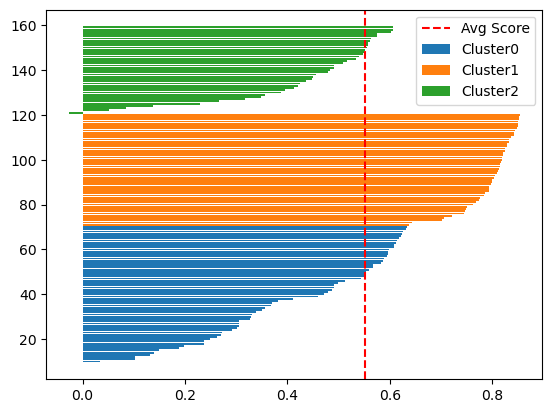

In [240]:
# 실루엣 차트 
y_lower=10
for i in range(3):
    cluster_i = score_samples[iris_df['cluster']==i]
    cluster_i.sort()
    y_upper = y_lower + len(cluster_i)
    plt.barh(range(y_lower, y_upper), cluster_i, label=f'Cluster{i}')
    y_lower = y_upper 

# average 
avg_score = silhouette_score(iris.data, iris_df['cluster']) 
plt.axvline(avg_score, color='red', linestyle='--', label='Avg Score')
plt.legend()
plt.show()

In [241]:
# scree plot
KM.inertia_

78.85566582597728

In [242]:
inertia = []
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # 군집 모델 
    

In [243]:
scree_df = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:14

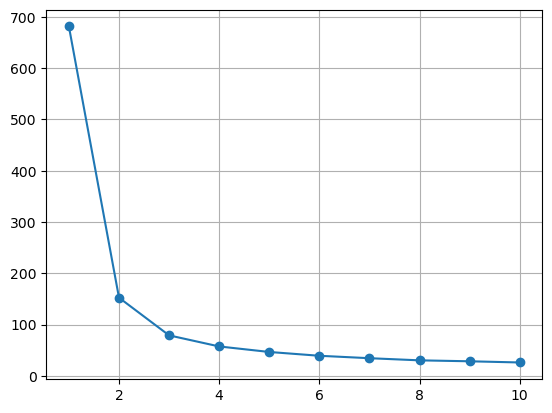

In [244]:
inertia = []
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # 군집 모델 
    kmeans.fit(scree_df)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.grid()
plt.show()

# PCA
> 2개의 주성분으로 축소 

분산을 최데로 유지, 재구성 오차를 최소화 

In [245]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed.shape

(150, 2)

In [246]:
iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755


# PCA 결과 시각화 

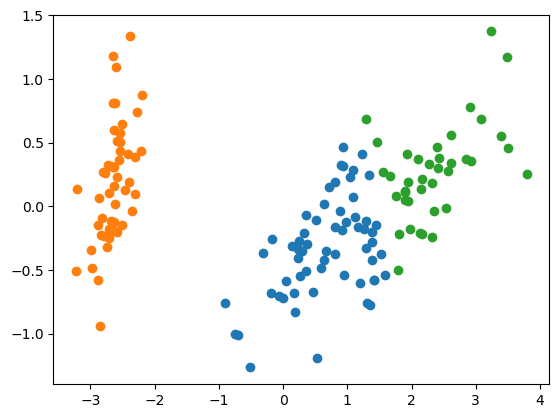

In [247]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==0, 'pca_y'], marker='o')

plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==1, 'pca_y'], marker='o')

plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==2, 'pca_y'], marker='o')

plt.show()

In [248]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [249]:
# standardScaler 로 스케일링 
# PCA 2개로 축소 
# 시각화 

In [250]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [251]:
# 1. 데이터 불러오기 
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [252]:
# 2. 스케일링 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_df)
scaled_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [253]:
# 3. PCA로 2차원 축소 
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_data)
iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),pca_x,pca_y
0,5.1,3.5,1.4,0.2,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,-2.389842,0.646835


In [254]:
# 4. KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(scaled_data)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


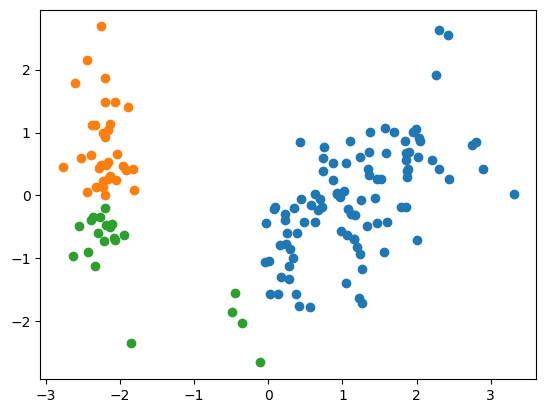

In [255]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==0, 'pca_y'], marker='o')

plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==1, 'pca_y'], marker='o')

plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==2, 'pca_y'], marker='o')

plt.show()

In [256]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

# 클러스터링 실습 

In [257]:
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [258]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [259]:
KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
KM.fit(cancer_df)
KM.labels_

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0,
       0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [260]:
# 2. 스케일링 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# PCA 차원 축소 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]
df['cluster'] = cluster_labels

plt.scatter(x=X_scaled.loc[X_scaled['cluster']==0, 'pca_x'], 
            y=X_scaled.loc[X_scaled['cluster']==0, 'pca_y'], marker='o')
plt.scatter(x=X_scaled.loc[X_scaled['cluster']==1, 'pca_x'], 
            y=X_scaled.loc[X_scaled['cluster']==1, 'pca_y'], marker='^')
plt.scatter(x=X_scaled.loc[X_scaled['cluster']==2, 'pca_x'], 
            y=X_scaled.loc[X_scaled['cluster']==2, 'pca_y'], marker='s')

plt.show()

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


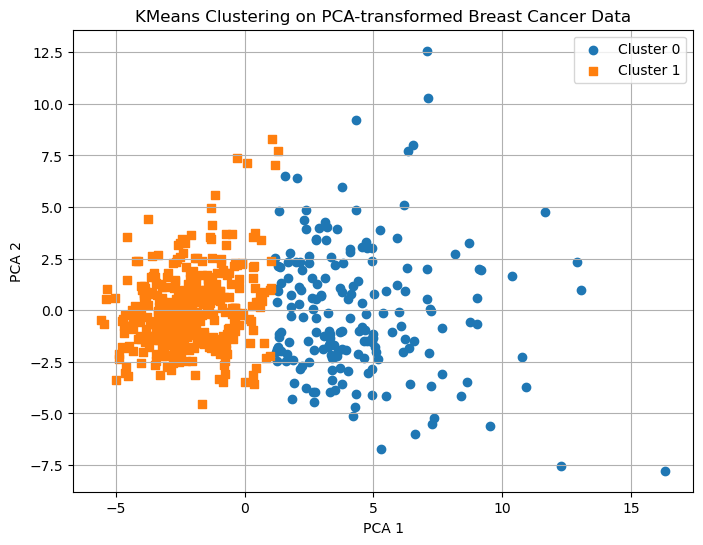

PCA Components: 2

 Explained Variance Ratio (분산 설명 비율):
[0.72962445 0.22850762]

 Cumulative Explained Variance: 0.9581

 Silhouette Score (군집 평가 지표): 0.5033


In [261]:
# 1. 데이터 불러오기
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# 2. 스케일링
scaler = StandardScaler()
cancer_scaled = scaler.fit_transform(cancer_df)

# 3. KMeans 클러스터링
kmeans = KMeans(n_clusters=2, random_state=42)  # 2개 군집 (악성/양성)
cancer_df['cluster'] = kmeans.fit_predict(cancer_scaled)

# 4. PCA 2D 축소
pca_scaled = PCA(n_components=2)
pca_transformed_scaled = pca_scaled.fit_transform(cancer_scaled)
cancer_df['pca_scaled_x'] = pca_transformed_scaled[:, 0]
cancer_df['pca_scaled_y'] = pca_transformed_scaled[:, 1]

# 5. 시각화
plt.figure(figsize=(8, 6))
plt.scatter(
    x=cancer_df.loc[cancer_df['cluster'] == 0, 'pca_scaled_x'],
    y=cancer_df.loc[cancer_df['cluster'] == 0, 'pca_scaled_y'],
    marker='o',
    label='Cluster 0'
)
plt.scatter(
    x=cancer_df.loc[cancer_df['cluster'] == 1, 'pca_scaled_x'],
    y=cancer_df.loc[cancer_df['cluster'] == 1, 'pca_scaled_y'],
    marker='s',
    label='Cluster 1'
)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clustering on PCA-transformed Breast Cancer Data')
plt.legend()
plt.grid(True)
plt.show()

# 1. PCA 성분 개수 및 설명력
print("PCA Components: 2")

print("\n Explained Variance Ratio (분산 설명 비율):")
print(pca.explained_variance_ratio_)

print(f"\n Cumulative Explained Variance: {np.sum(pca.explained_variance_ratio_):.4f}")

# 2. 실루엣 계수
sil_score = silhouette_score(cancer_df[cancer.feature_names], cancer_df['cluster'])
print(f"\n Silhouette Score (군집 평가 지표): {sil_score:.4f}")


In [262]:
pca.explained_variance_ratio_ # 컷번째 두번쨰 주성분 

array([0.72962445, 0.22850762])

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


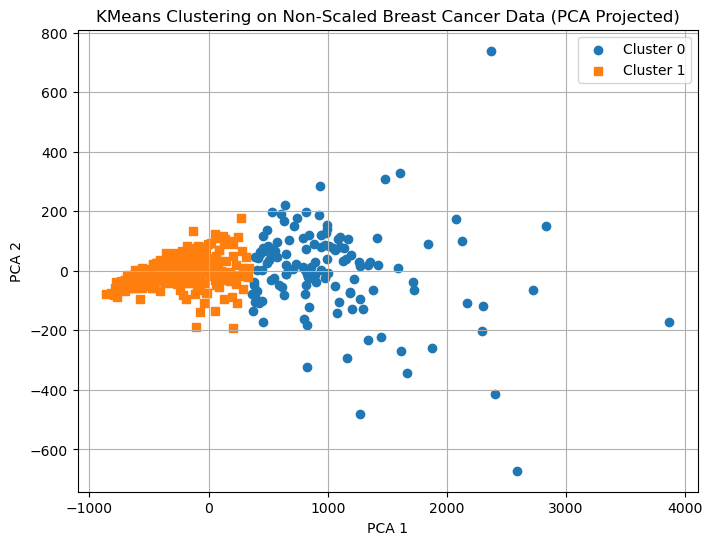

PCA Components: 2

 Explained Variance Ratio (분산 설명 비율):
[0.98204467 0.01617649]

 Cumulative Explained Variance: 0.9982

 Silhouette Score (군집 평가 지표): 0.6973


In [263]:
# 스케일링 안한 버전 
# 1. 데이터 불러오기
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# 2. PCA (스케일링 없이 바로 원본 데이터에 적용)
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(cancer_df)
cancer_df['pca_x'] = pca_transformed[:, 0]
cancer_df['pca_y'] = pca_transformed[:, 1]

# 3. KMeans 클러스터링 (PCA 이전 원본 데이터에 적용)
kmeans = KMeans(n_clusters=2, random_state=42)
cancer_df['cluster'] = kmeans.fit_predict(cancer_df[cancer.feature_names])

# 4. 시각화
plt.figure(figsize=(8, 6))
plt.scatter(
    x=cancer_df.loc[cancer_df['cluster'] == 0, 'pca_x'],
    y=cancer_df.loc[cancer_df['cluster'] == 0, 'pca_y'],
    marker='o',
    label='Cluster 0'
)
plt.scatter(
    x=cancer_df.loc[cancer_df['cluster'] == 1, 'pca_x'],
    y=cancer_df.loc[cancer_df['cluster'] == 1, 'pca_y'],
    marker='s',
    label='Cluster 1'
)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clustering on Non-Scaled Breast Cancer Data (PCA Projected)')
plt.legend()
plt.grid(True)
plt.show()

# 1. PCA 성분 개수 및 설명력
print("PCA Components: 2")

print("\n Explained Variance Ratio (분산 설명 비율):")
print(pca.explained_variance_ratio_)

print(f"\n Cumulative Explained Variance: {np.sum(pca.explained_variance_ratio_):.4f}")

# 2. 실루엣 계수
sil_score = silhouette_score(cancer_df[cancer.feature_names], cancer_df['cluster'])
print(f"\n Silhouette Score (군집 평가 지표): {sil_score:.4f}")



In [264]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [265]:
# pca 2개의 주성분, ... 그 이상 주성분 추출 
# explained_variance_ratio이 가장 높은 주성분의 개수
# kmean data = pca1, pca2, cluster=2